## Movies Score Prediction and Movie Recommendation



### **Import the required Python libraries**

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

### **Import the dataset**

In [379]:
movies = pd.read_csv('Movies.csv')

## **Data Exploration & Cleaning**

In [380]:
movies.head()

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director
0,0,The Shawshank Redemption,(1994),9.3,"2,750,788",82,$28.34M,R,142 min,Drama,"\nOver the course of several years, two convic...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont
1,1,The Dark Knight,(2008),9.0,"2,723,562",84,$534.86M,PG-13,152 min,"Action, Crime, Drama",\nWhen the menace known as the Joker wreaks ha...,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan
2,2,Inception,(2010),8.8,"2,417,409",74,$292.58M,PG-13,148 min,"Action, Adventure, Sci-Fi",\nA thief who steals corporate secrets through...,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan
3,3,Fight Club,(1999),8.8,"2,190,467",66,$37.03M,R,139 min,Drama,\nAn insomniac office worker and a devil-may-c...,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",David Fincher
4,4,Forrest Gump,(1994),8.8,"2,139,965",82,$330.25M,PG-13,142 min,"Drama, Romance","\nThe presidencies of Kennedy and Johnson, the...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",Robert Zemeckis


In [381]:
len(movies)

500

### **Preprocessing**

In [382]:
movies["Year"] = movies["Year"].str.replace('(','')
movies["Year"] = movies["Year"].str.replace(')','')
movies["Genre"] = movies["Genre"].str.replace('\n','')
movies["Overview"] = movies["Overview"].str.replace('\n', '')
movies["Certificate"] = movies["Certificate"].str.replace('[', '')
movies["Certificate"] = movies["Certificate"].str.replace('<span class="certificate">', '')
movies["Certificate"] = movies["Certificate"].str.replace('</span>]', '')

In [383]:
movies.shape

(500, 13)

In [384]:
movies.size

6500

In [385]:
movies.index

RangeIndex(start=0, stop=500, step=1)

In [386]:
movies.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Rating', 'Vote', 'Metascore', 'Budget',
       'Certificate', 'Runtime', 'Genre', 'Overview', 'Artist', 'Director'],
      dtype='object')

In [387]:
movies.dtypes

Unnamed: 0       int64
Title           object
Year            object
Rating         float64
Vote            object
Metascore        int64
Budget          object
Certificate     object
Runtime         object
Genre           object
Overview        object
Artist          object
Director        object
dtype: object

In [388]:
movies.head()

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director
0,0,The Shawshank Redemption,1994,9.3,"2,750,788",82,$28.34M,R,142 min,Drama,"Over the course of several years, two convicts...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Frank Darabont
1,1,The Dark Knight,2008,9.0,"2,723,562",84,$534.86M,PG-13,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan
2,2,Inception,2010,8.8,"2,417,409",74,$292.58M,PG-13,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan
3,3,Fight Club,1999,8.8,"2,190,467",66,$37.03M,R,139 min,Drama,An insomniac office worker and a devil-may-car...,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",David Fincher
4,4,Forrest Gump,1994,8.8,"2,139,965",82,$330.25M,PG-13,142 min,"Drama, Romance","The presidencies of Kennedy and Johnson, the V...","['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",Robert Zemeckis


## **Working with the Genres column**

Drama appears to be the most popular genre followed by Comedy.

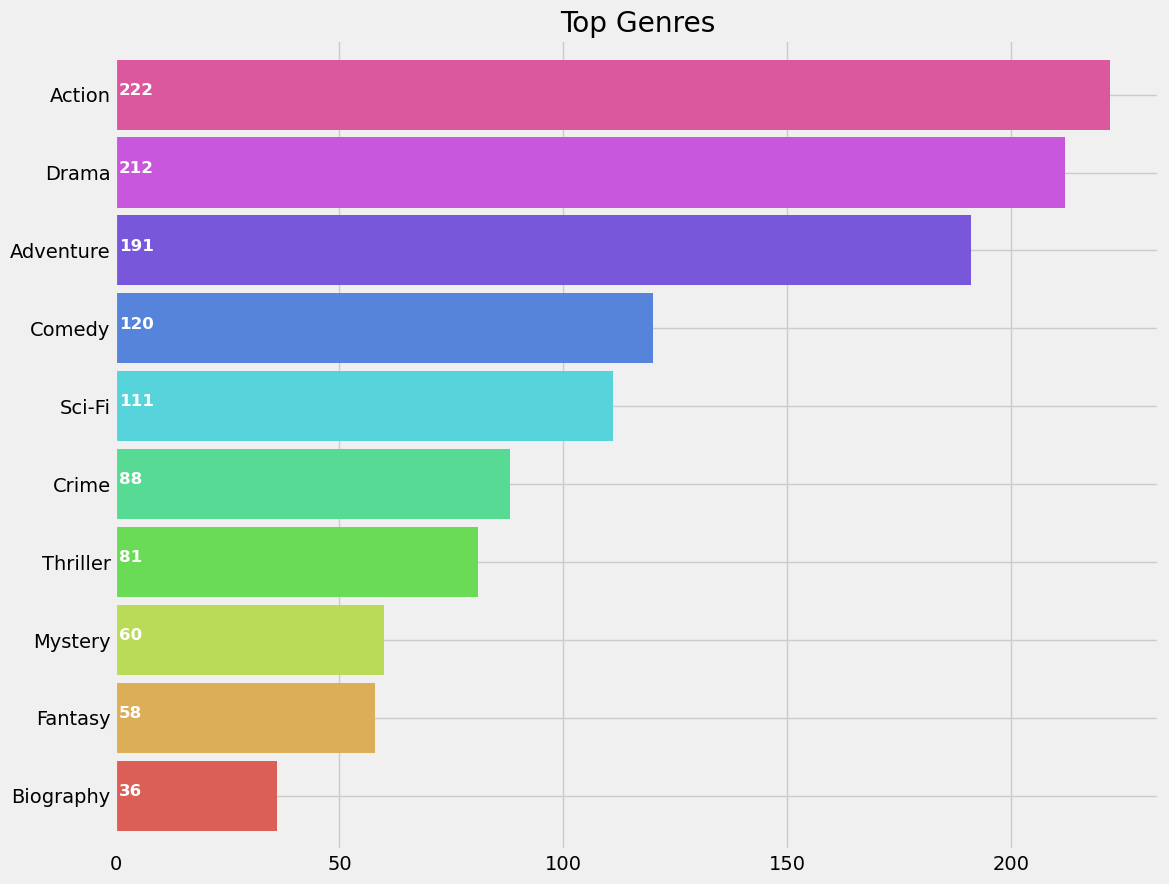

In [423]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['Genre']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [390]:
for i,j in zip(movies['Genre'],movies.index):
    list2=[]
    list2=i
    sorted(list2)
    movies.loc[j,'Genre']=str(list2)
movies['Genre'] = movies['Genre'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Genre'] = movies['Genre'].str.split(',')

Now lets generate a list 'genreList' with all possible unique genres mentioned in the dataset.



In [391]:
genreList = []
for index, row in movies.iterrows():
    genres = row["Genre"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Drama',
 'Action',
 'Crime',
 'Adventure',
 'Sci-Fi',
 'Romance',
 'Thriller',
 'Mystery',
 'Western',
 'War']

**One Hot Encoding for multiple labels**

In [392]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [393]:
movies['Genres_bin'] = movies['Genre'].apply(lambda x: binary(x))
movies['Genres_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Genres_bin, dtype: object

## **Working with the Cast Column**
 

In [394]:
movies['Artist'] = movies['Artist'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['Artist'] = movies['Artist'].str.split(',')

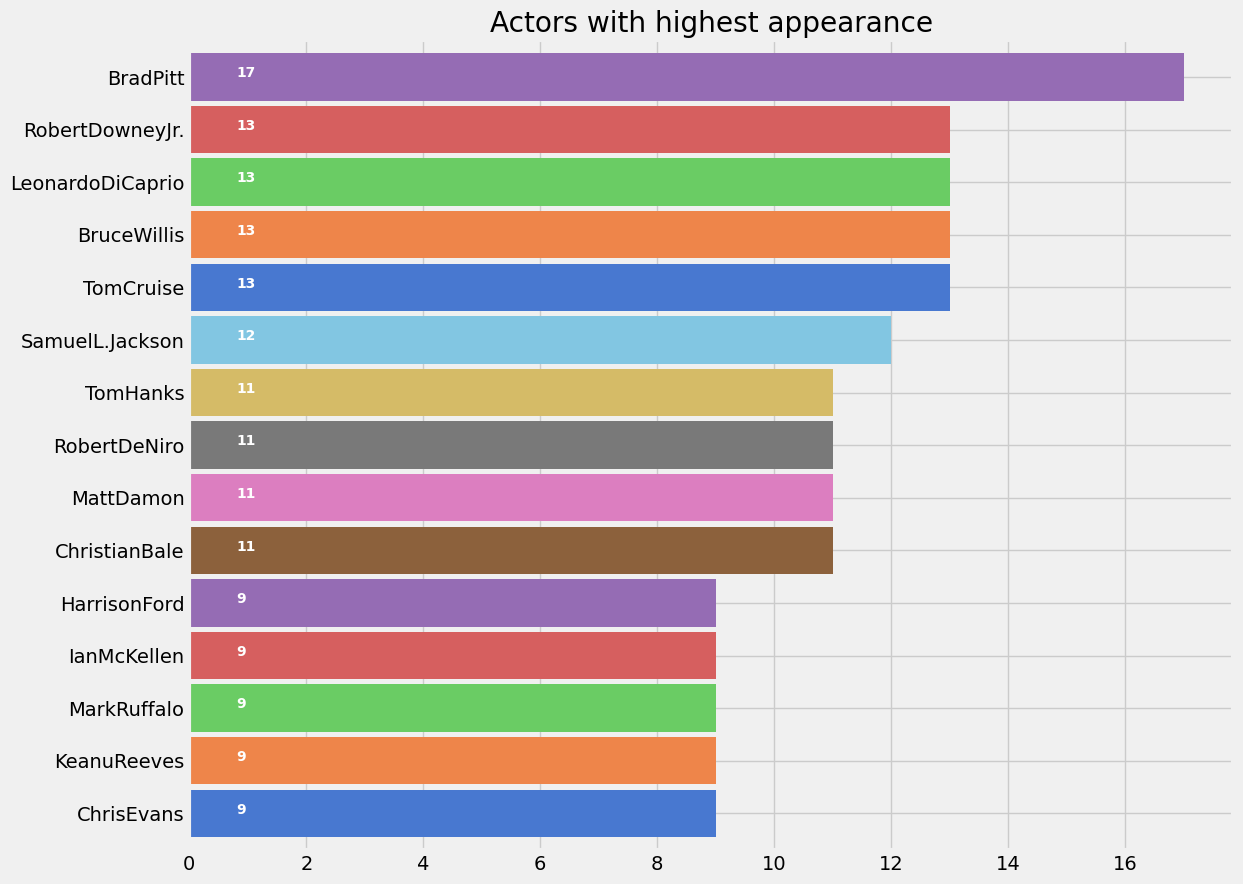

In [395]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['Artist']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [396]:
for i,j in zip(movies['Artist'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'Artist'] = str(list2)
movies['Artist'] = movies['Artist'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Artist'] = movies['Artist'].str.split(',')
for i,j in zip(movies['Artist'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'Artist'] = str(list2)
movies['Artist']=movies['Artist'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [397]:
castList = []
for index, row in movies.iterrows():
    cast = row["Artist"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [398]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [399]:
movies['Artist_bin'] = movies['Artist'].apply(lambda x: binary(x))
movies['Artist_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...
2    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...
3    [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...
4    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
Name: Artist_bin, dtype: object

## **Working with Director column**

In [400]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['Director'] = movies['Director'].apply(xstr)

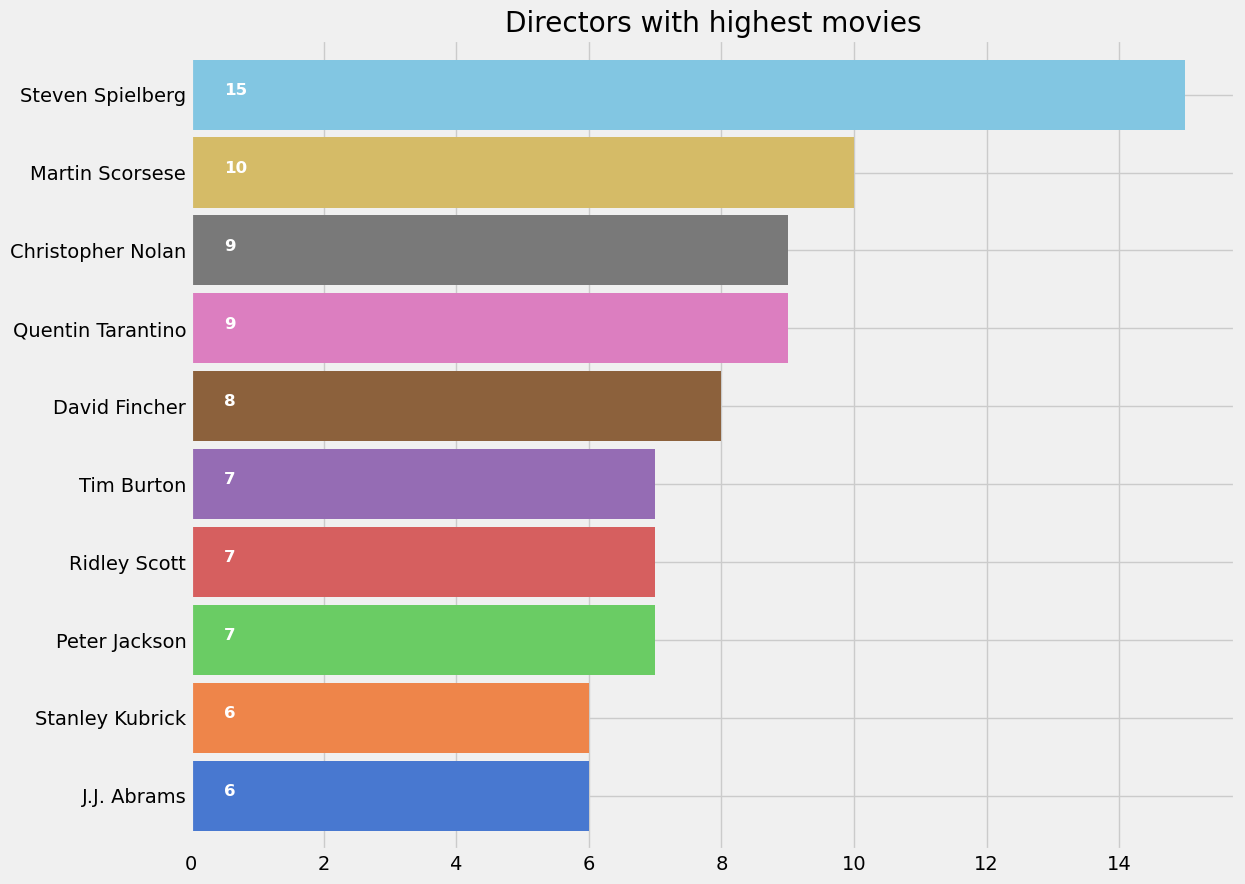

In [401]:
plt.subplots(figsize=(12,10))
ax = movies[movies['Director']!=''].Director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['Director']!=''].Director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [402]:
directorList=[]
for i in movies['Director']:
    if i not in directorList:
        directorList.append(i)

In [403]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [404]:
movies['Director_bin'] = movies['Director'].apply(lambda x: binary(x))
movies.head()

,Unnamed: 0,Title,Year,Rating,Vote,Metascore,Budget,Certificate,Runtime,Genre,Overview,Artist,Director,Genres_bin,Artist_bin,Director_bin
0,0,The Shawshank Redemption,1994,9.3,"2,750,788",82,$28.34M,R,142 min,[Drama],"Over the course of several years, two convicts...","BobGunton,MorganFreeman,TimRobbins,WilliamSadler",Frank Darabont,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,The Dark Knight,2008,9.0,"2,723,562",84,$534.86M,PG-13,152 min,"[Action, Crime, Drama]",When the menace known as the Joker wreaks havo...,"AaronEckhart,ChristianBale,HeathLedger,Michael...",Christopher Nolan,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Inception,2010,8.8,"2,417,409",74,$292.58M,PG-13,148 min,"[Action, Adventure, Sci-Fi]",A thief who steals corporate secrets through t...,"ElliotPage,JosephGordon-Levitt,KenWatanabe,Leo...",Christopher Nolan,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Fight Club,1999,8.8,"2,190,467",66,$37.03M,R,139 min,[Drama],An insomniac office worker and a devil-may-car...,"BradPitt,EdwardNorton,MeatLoaf,ZachGrenier",David Fincher,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Forrest Gump,1994,8.8,"2,139,965",82,$330.25M,PG-13,142 min,"[Drama, Romance]","The presidencies of Kennedy and Johnson, the V...","GarySinise,RobinWright,SallyField,TomHanks",Robert Zemeckis,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## **Working with the Keywords column**

In [405]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [406]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

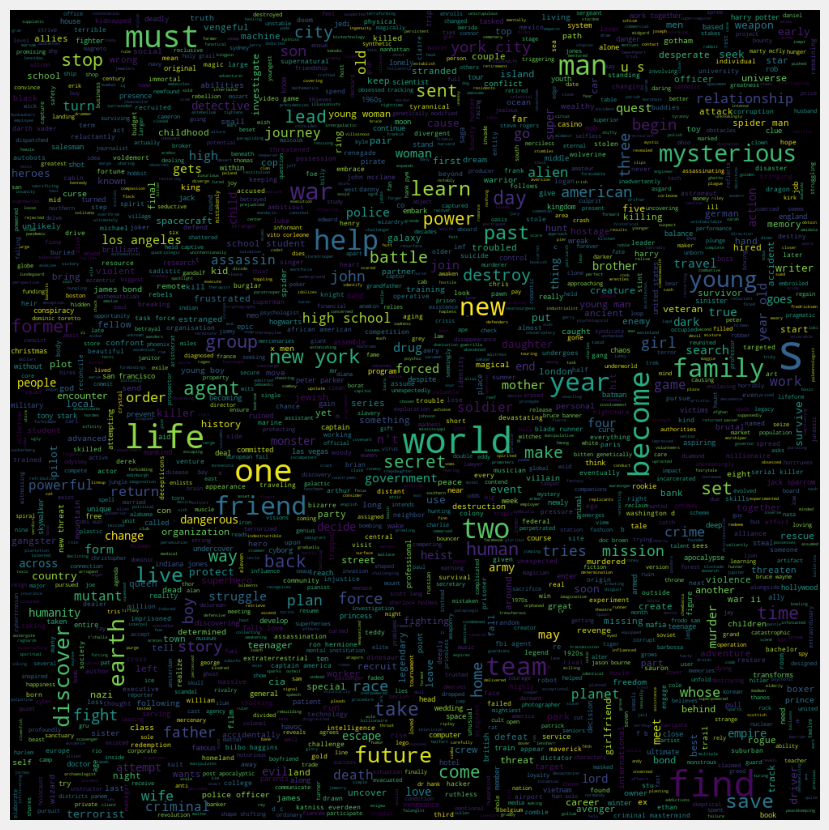

In [407]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['Overview'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Above is a wordcloud showing the major keywords or tags used for describing the movies.


In [408]:
movies['Overview'] = movies['Overview'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['Overview'] = movies['Overview'].str.split(',')
for i,j in zip(movies['Overview'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'Overview'] = str(list2)
movies['Overview'] = movies['Overview'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Overview'] = movies['Overview'].str.split(',')
for i,j in zip(movies['Overview'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'Overview'] = str(list2)
movies['Overview'] = movies['Overview'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['Overview'] = movies['Overview'].str.split(',')

In [409]:
words_list = []
for index, row in movies.iterrows():
    genres = row["Overview"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [410]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [411]:
movies['Overview_bin'] = movies['Overview'].apply(lambda x: binary(x))
movies = movies[(movies['Rating']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['Director']!='']

## Similarity between movies

We will we using Cosine Similarity for finding the similarity between 2 movies. 

In [412]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['Genres_bin']
    genresB = b['Genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['Artist_bin']
    scoreB = b['Artist_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['Director_bin']
    directB = b['Director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['Overview_bin']
    wordsB = b['Overview_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [413]:
Similarity(3,160) #checking similarity between any 2 random movies

3.400855310484722

We see that the distance is about 2.068, which is high. The more the distance, the less similar the movies are. Let's see what these random movies actually were.

In [422]:
print(movies.iloc[3])
print()
print(movies.iloc[160])

Title                                                  Fight Club
Genre                                                     [Drama]
Rating                                                        8.8
Genres_bin      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Artist_bin      [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...
new_id                                                          3
Director                                            David Fincher
Director_bin    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Overview_bin    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object

Title                                       2001: A Space Odyssey
Genre                                         [Adventure, Sci-Fi]
Rating                                                        8.3
Genres_bin      [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Artist_bin      [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...
new_id                                              

It is evident that The Dark Knight Rises and How to train your Dragon 2 are very different movies. Thus the distance is huge.



In [415]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['Title','Genre','Rating','Genres_bin','Artist_bin','new_id','Director','Director_bin','Overview_bin']]
movies.head()

,Title,Genre,Rating,Genres_bin,Artist_bin,new_id,Director,Director_bin,Overview_bin
0,The Shawshank Redemption,[Drama],9.3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,Frank Darabont,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,The Dark Knight,"[Action, Crime, Drama]",9.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...",1,Christopher Nolan,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Inception,"[Action, Adventure, Sci-Fi]",8.8,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...",2,Christopher Nolan,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
3,Fight Club,[Drama],8.8,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",3,David Fincher,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,Forrest Gump,"[Drama, Romance]",8.8,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...",4,Robert Zemeckis,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ..."


## **Score Predictor**

In [416]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['Title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.Title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['Title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['Title'].values[0],new_movie['Rating']))

In [417]:
predict_score('Inception')

Selected Movie:  Inception

Recommended Movies: 

Tenet | Genres: 'Action','Sci-Fi','Thriller' | Rating: 7.3
Interstellar | Genres: 'Adventure','Drama','Sci-Fi' | Rating: 8.7
Batman Begins | Genres: 'Action','Crime','Drama' | Rating: 8.2
The Dark Knight | Genres: 'Action','Crime','Drama' | Rating: 9.0
The Dark Knight Rises | Genres: 'Action','Drama','Thriller' | Rating: 8.4
The Prestige | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 8.5
Dunkirk | Genres: 'Action','Drama','History' | Rating: 7.8
Memento | Genres: 'Mystery','Thriller' | Rating: 8.4
Black Widow | Genres: 'Action','Adventure','Sci-Fi' | Rating: 6.7
Godzilla | Genres: 'Action','Adventure','Sci-Fi' | Rating: 6.4


The predicted rating for Inception is: 7.940000
The actual rating for Inception is 8.800000


In [418]:
predict_score('Donnie Darko')

Selected Movie:  Donnie Darko

Recommended Movies: 

The Prestige | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 8.5
Arrival | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.9
Cloud Atlas | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.4
Signs | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 6.8
Moon | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.8
Unbreakable | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 7.3
Prisoners | Genres: 'Crime','Drama','Mystery' | Rating: 8.1
Ex Machina | Genres: 'Drama','Sci-Fi','Thriller' | Rating: 7.7
Watchmen | Genres: 'Action','Drama','Mystery' | Rating: 7.6
Zodiac | Genres: 'Crime','Drama','Mystery' | Rating: 7.7


The predicted rating for Donnie Darko is: 7.680000
The actual rating for Donnie Darko is 8.000000


In [419]:
predict_score('Zodiac')

Selected Movie:  Zodiac

Recommended Movies: 

The Girl with the Dragon Tattoo | Genres: 'Crime','Drama','Mystery' | Rating: 7.8
Se7en | Genres: 'Crime','Drama','Mystery' | Rating: 8.6
Gone Girl | Genres: 'Drama','Mystery','Thriller' | Rating: 8.1
The Game | Genres: 'Drama','Mystery','Thriller' | Rating: 7.7
The Social Network | Genres: 'Biography','Drama' | Rating: 7.8
Fight Club | Genres: 'Drama' | Rating: 8.8
The Curious Case of Benjamin Button | Genres: 'Drama','Fantasy','Romance' | Rating: 7.8
The Hateful Eight | Genres: 'Crime','Drama','Mystery' | Rating: 7.8
Prisoners | Genres: 'Crime','Drama','Mystery' | Rating: 8.1
Inside Man | Genres: 'Crime','Drama','Mystery' | Rating: 7.6


The predicted rating for Zodiac is: 8.010000
The actual rating for Zodiac is 7.700000


In [420]:
predict_score('Batman')

Selected Movie:  Batman Begins

Recommended Movies: 

The Dark Knight | Genres: 'Action','Crime','Drama' | Rating: 9.0
Dunkirk | Genres: 'Action','Drama','History' | Rating: 7.8
The Dark Knight Rises | Genres: 'Action','Drama','Thriller' | Rating: 8.4
The Prestige | Genres: 'Drama','Mystery','Sci-Fi' | Rating: 8.5
Inception | Genres: 'Action','Adventure','Sci-Fi' | Rating: 8.8
Tenet | Genres: 'Action','Sci-Fi','Thriller' | Rating: 7.3
Interstellar | Genres: 'Adventure','Drama','Sci-Fi' | Rating: 8.7
Memento | Genres: 'Mystery','Thriller' | Rating: 8.4
Heat | Genres: 'Action','Crime','Drama' | Rating: 8.3
Sicario | Genres: 'Action','Crime','Drama' | Rating: 7.6


The predicted rating for Batman Begins is: 8.280000
The actual rating for Batman Begins is 8.200000


In [421]:
#predict_score()